In [ ]:
import QRC_construction.Dataset as DT
import QRC_construction.Optimization as OP

%matplotlib inline

---
---
---

# 3. QRC on Quantum Dataset


Here we test our QRC on multiple quantum datasets...

---
---

## 3.1 Time-Dependent Single-qubit Hamiltonian (XYZ meas.)

In [12]:
dt_H = 0.1
T_test_H = 10

T_train_H_A = 250
T_H_A = T_train_H_A + T_test_H
T_train_H_B = 500
T_H_B = T_train_H_B + T_test_H
T_train_H_C = 1000
T_H_C = T_train_H_C + T_test_H

T_H = 1500

y_meas_basis = (("X", "Y", "Z"), (), ())

In [13]:
H, H_expr = DT.generate_random_hamiltonian(1, time_indep=False, seed=0)
y_H = DT.dataset_from_time_dep_H(T_H, H, dt_H, 1, seed=0)
print(H_expr)

H(t) = H0 + sin(t) * H1
where
H ≈ 0.4712 * Y + 0.2542 * X + 0.0104 * Z
H ≈ -0.9443 * X - 0.5136 * Y - 0.3725 * Z


In [ ]:
H_best_params_A, H_worst_params_A = OP.find_optimal_res_sliding_window_quantum_dataset(y_H[:T_H_A], T_train_H_A, T_test_H, nb_input_qubits = 1,
                                                                                                sliding_window_size_range=(1,3), 
                                                                                                nb_extra_qubits_range=(1,3), 
                                                                                                seeds=[0,1], 
                                                                                                y_meas_bases = y_meas_basis,
                                                                                                try_res_G=True,
                                                                                                try_res_MG=False,
                                                                                                try_res_D=False,
                                                                                                try_res_ISING=False,
                                                                                                depths_G=[3, 5, 10])

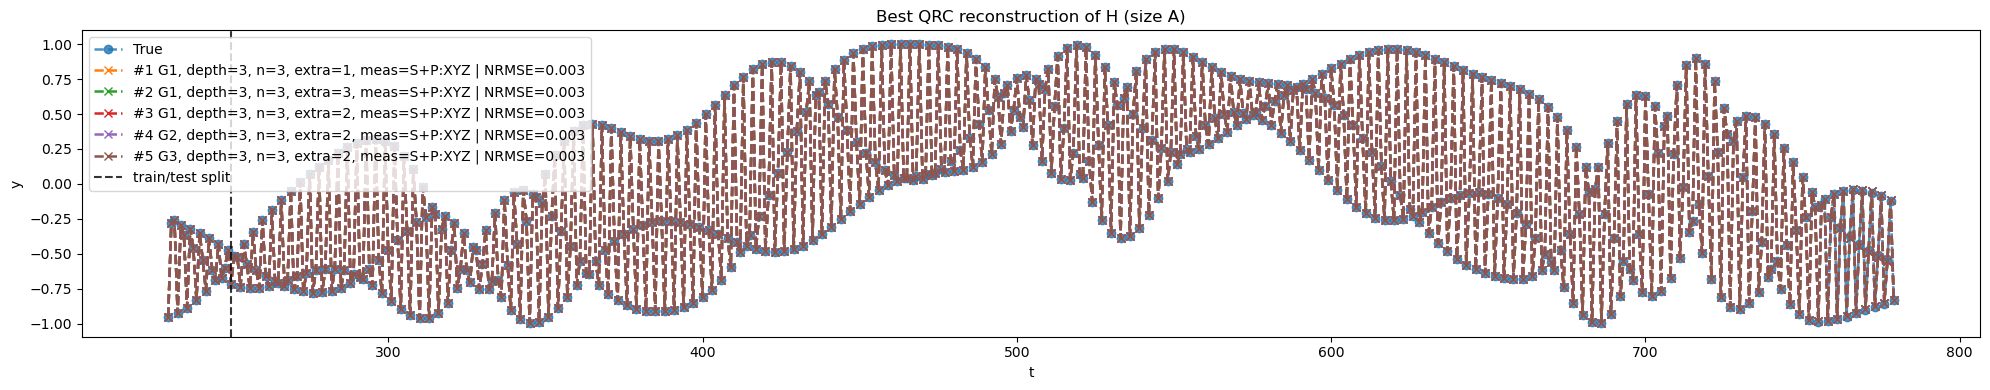

In [16]:
file_path_HA = "datas/Quantum_Datasets/G/HA.txt"
H_best_params_A, H_worst_params_A = OP.recompute_best_worst_from_logfile(file_path_HA, y_H[:T_H_A], T_train_H_A, T_test_H, nb_input_qubits = 1, k=5, is_dataset_classical=False, y_meas_bases=y_meas_basis) 
OP.plot_ranked_predictions(H_best_params_A[:5],T_train=T_train_H_A,title="Best QRC reconstruction of H (size A)", steps_training_included=20)

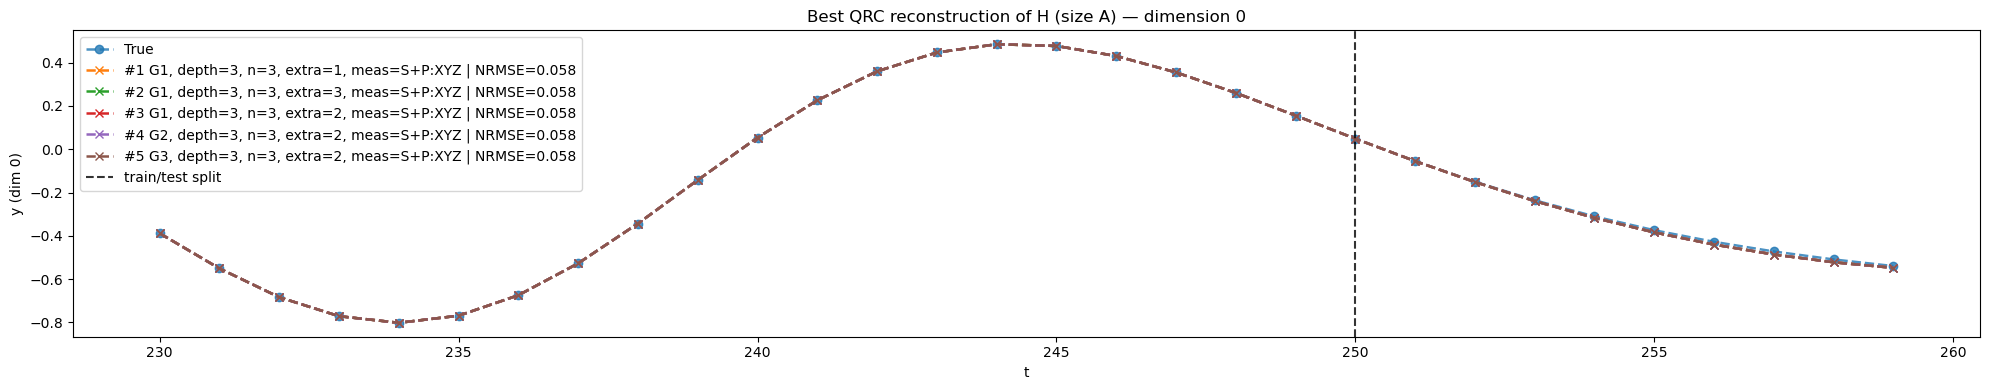

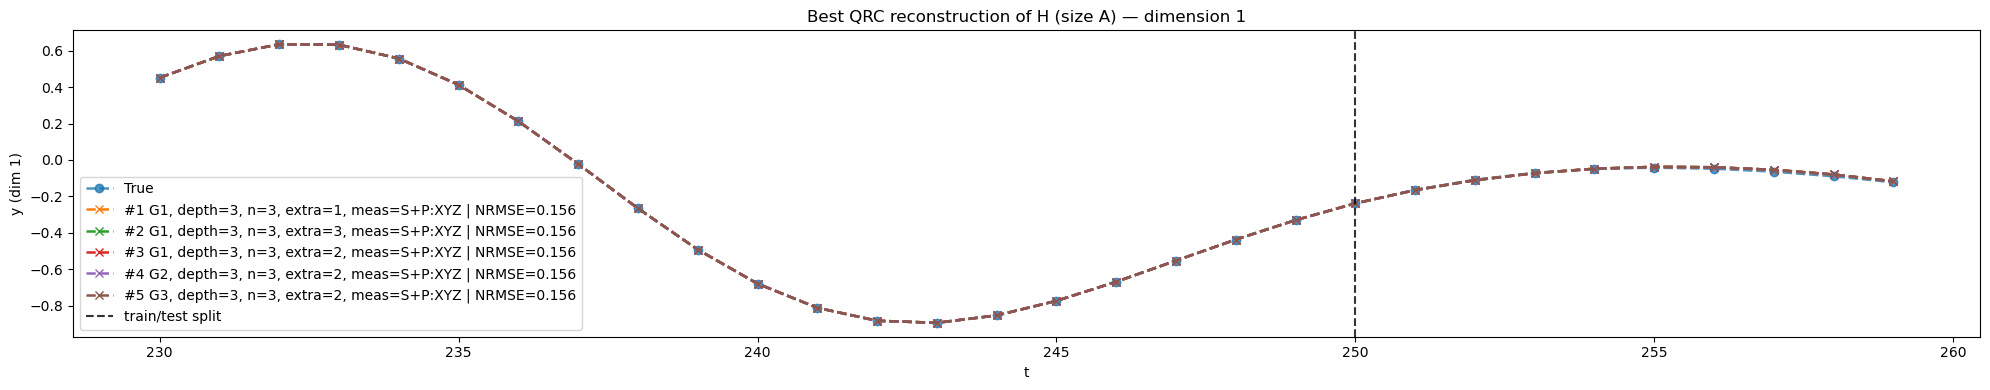

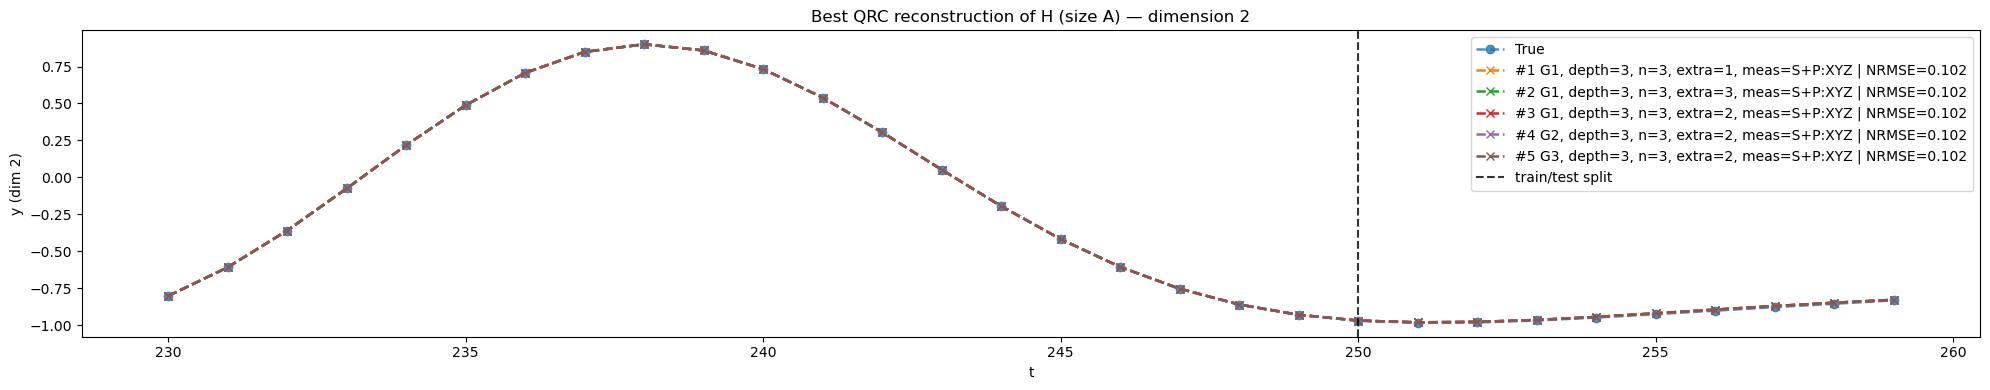

In [223]:
OP.plot_ranked_predictions_per_dim(
    H_best_params_A[:5],
    T_train_H_A,
    title="Best QRC reconstruction of H (size A)", steps_training_included=20)

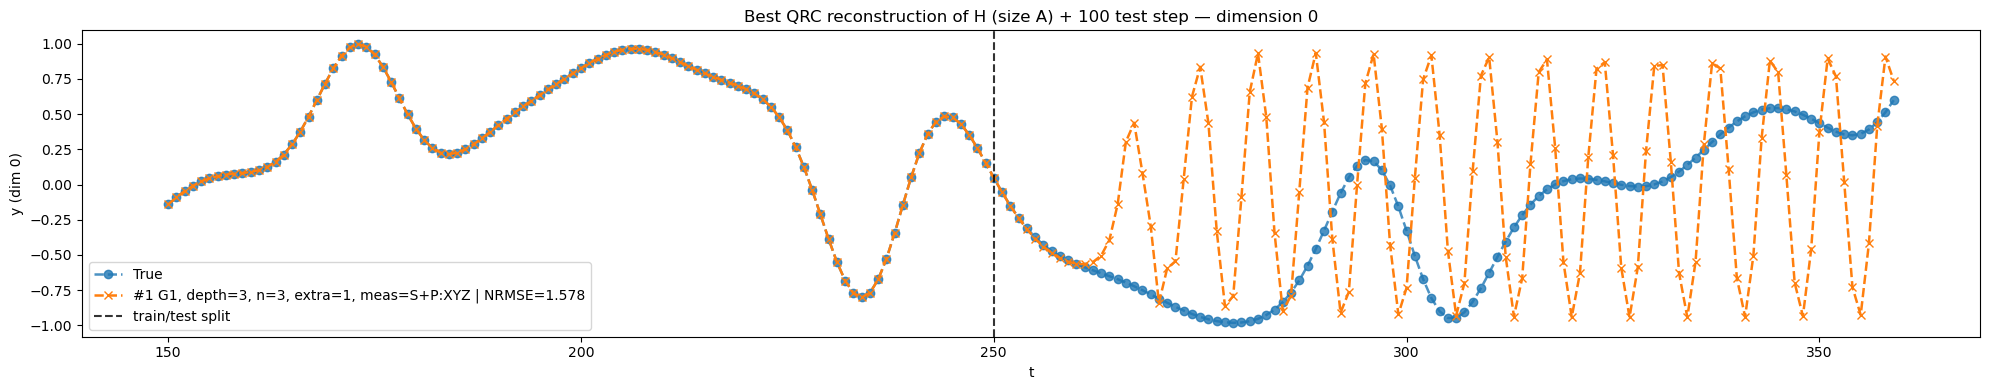

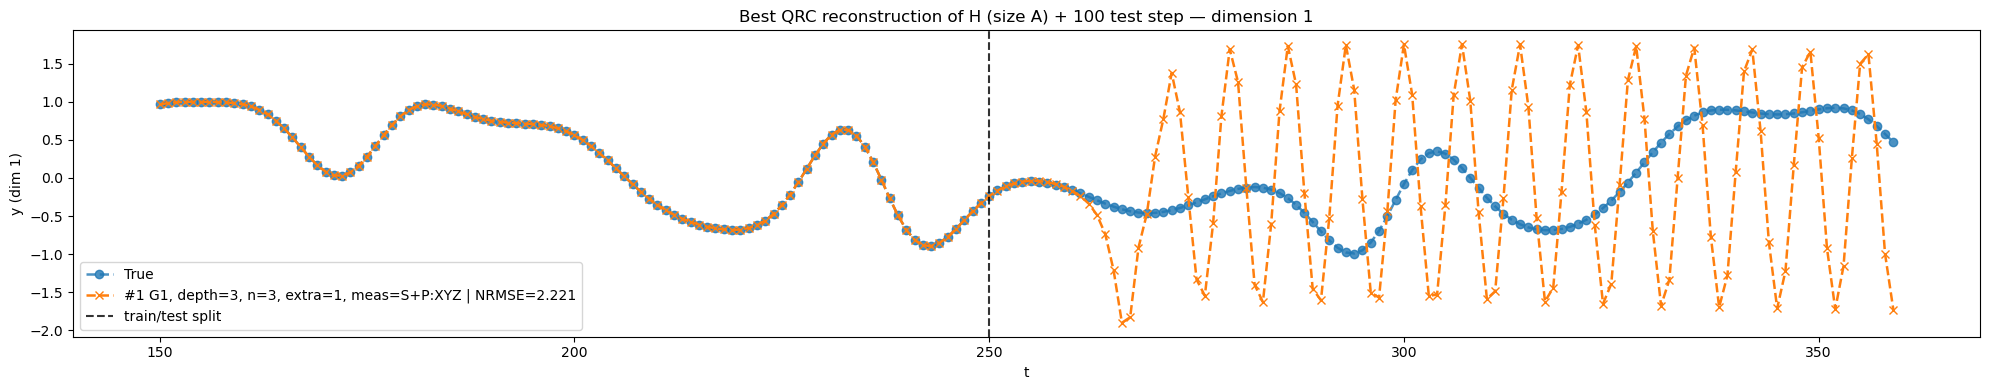

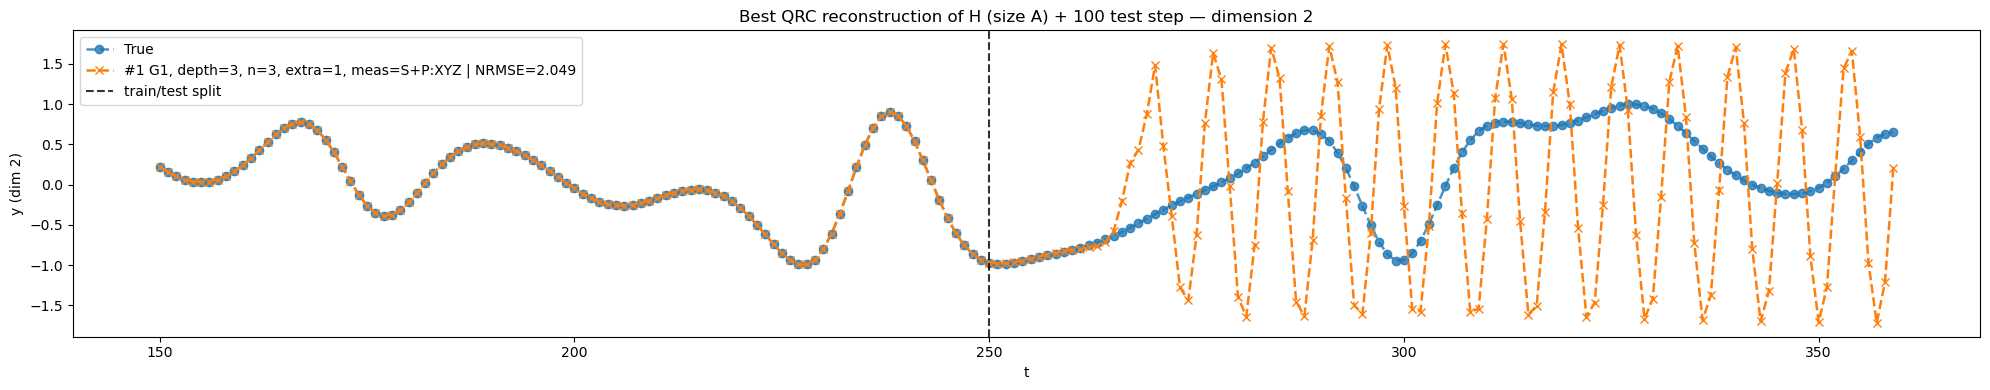

In [ ]:
H_best_params_AP, H_worst_params_AP = OP.recompute_best_worst_from_logfile(file_path_HA, y_H[:T_H_A+100], T_train_H_A, T_test_H+100, nb_input_qubits = 1, k=1, is_dataset_classical=False, y_meas_bases=y_meas_basis) 
OP.plot_ranked_predictions_per_dim(
    H_best_params_AP[:1],
    T_train_H_A,
    title="Best QRC reconstruction of H (size A) + 100 test step", steps_training_included=100)

In [ ]:
H_best_params_B, H_worst_params_B = OP.find_optimal_res_sliding_window_quantum_dataset(y_H[:T_H_B], T_train_H_B, T_test_H, nb_input_qubits = 1,
                                                                                                sliding_window_size_range=(1,3), 
                                                                                                nb_extra_qubits_range=(1,2), 
                                                                                                seeds=[0,1], 
                                                                                                y_meas_bases = y_meas_basis,
                                                                                                try_res_G=True,
                                                                                                try_res_MG=False,
                                                                                                try_res_D=False,
                                                                                                try_res_ISING=False,
                                                                                                depths_G=[3, 5, 10])

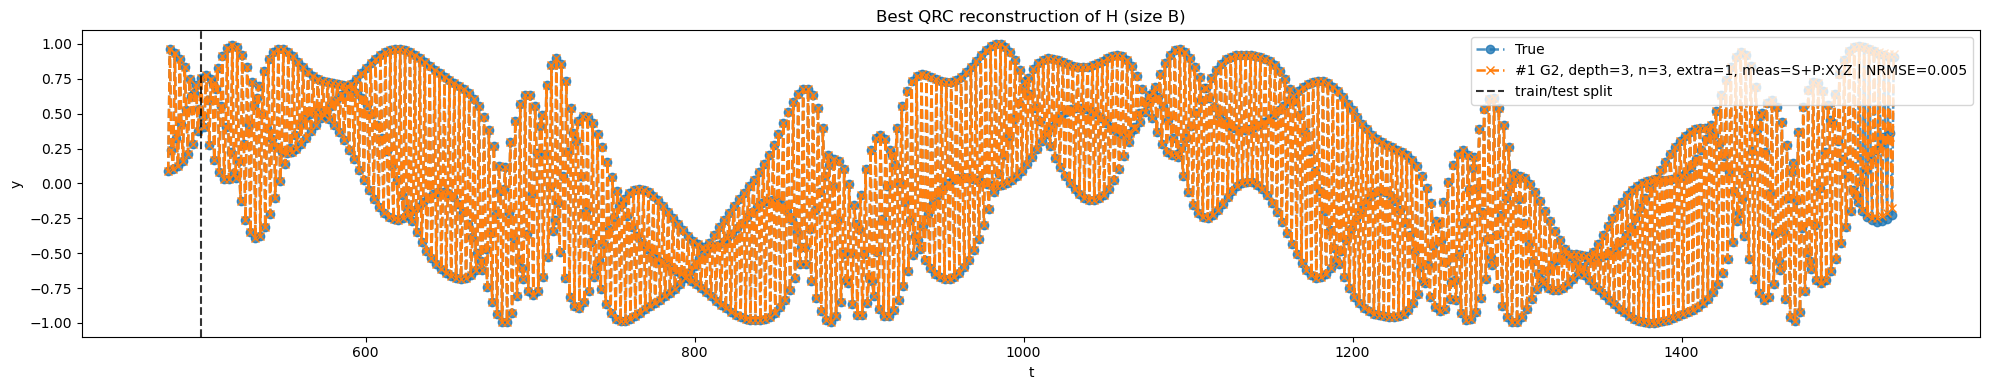

In [17]:
file_path_HB = "datas/Quantum_Datasets/G/HB.txt"
H_best_params_B, H_worst_params_B = OP.recompute_best_worst_from_logfile(file_path_HB, y_H[:T_H_B], T_train_H_B, T_test_H, nb_input_qubits = 1, k=1, is_dataset_classical=False, y_meas_bases=y_meas_basis) 
OP.plot_ranked_predictions(H_best_params_B[:1],T_train=T_train_H_B,title="Best QRC reconstruction of H (size B)", steps_training_included=20)

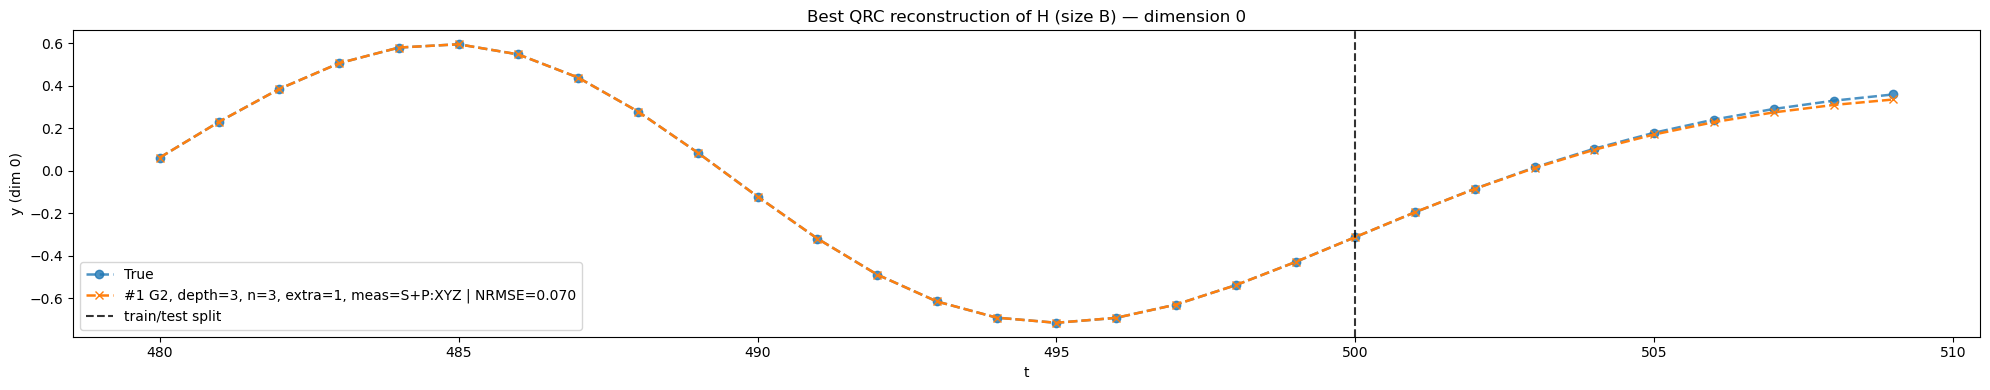

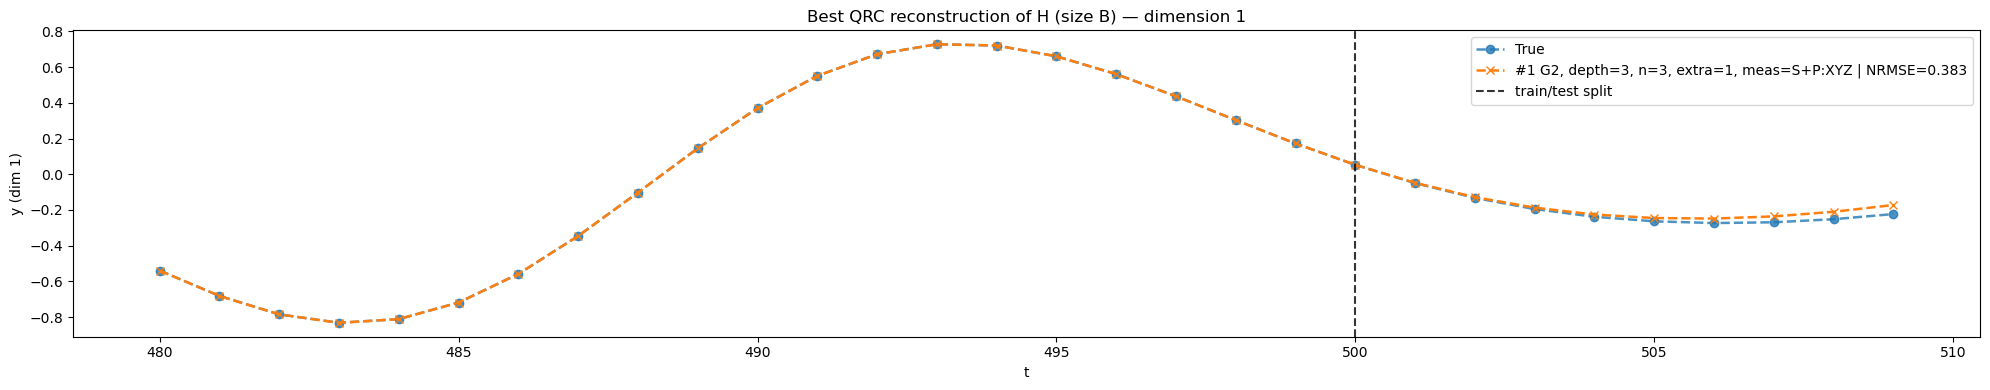

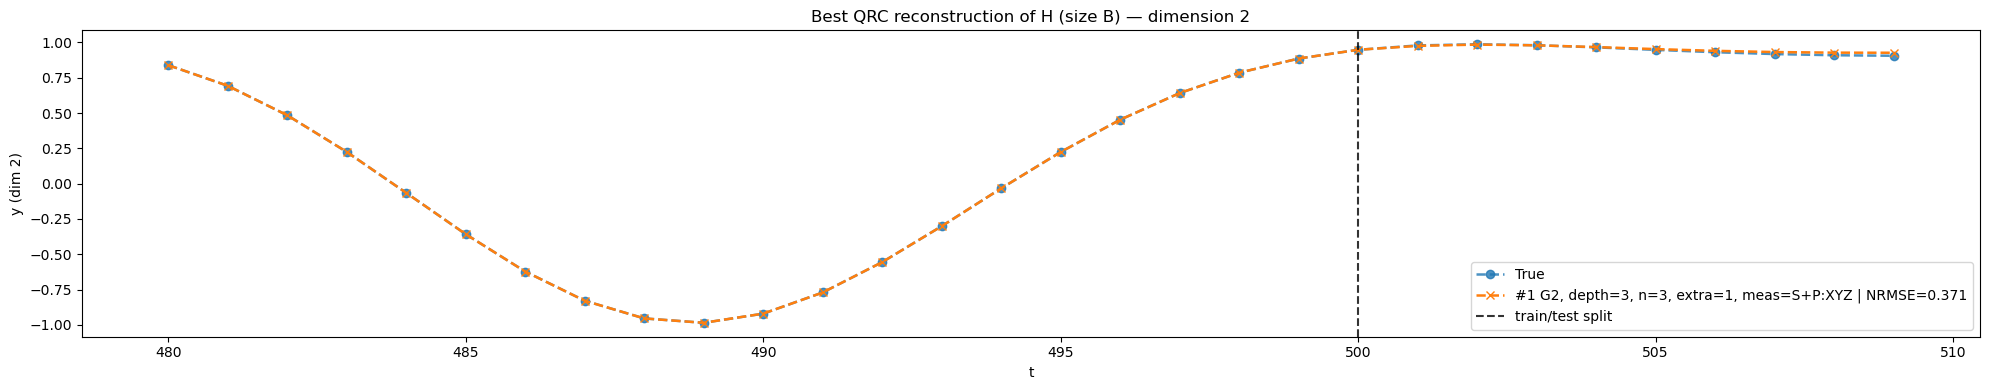

In [18]:
OP.plot_ranked_predictions_per_dim(
    H_best_params_B[:1],
    T_train_H_B,
    title="Best QRC reconstruction of H (size B)", steps_training_included=20)

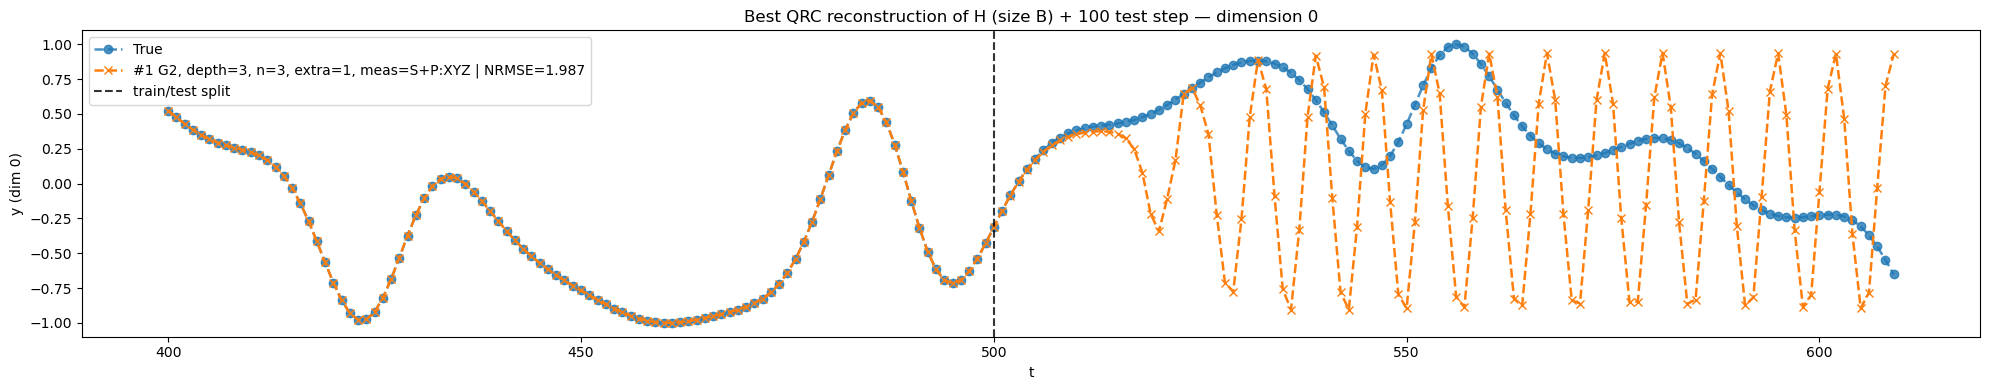

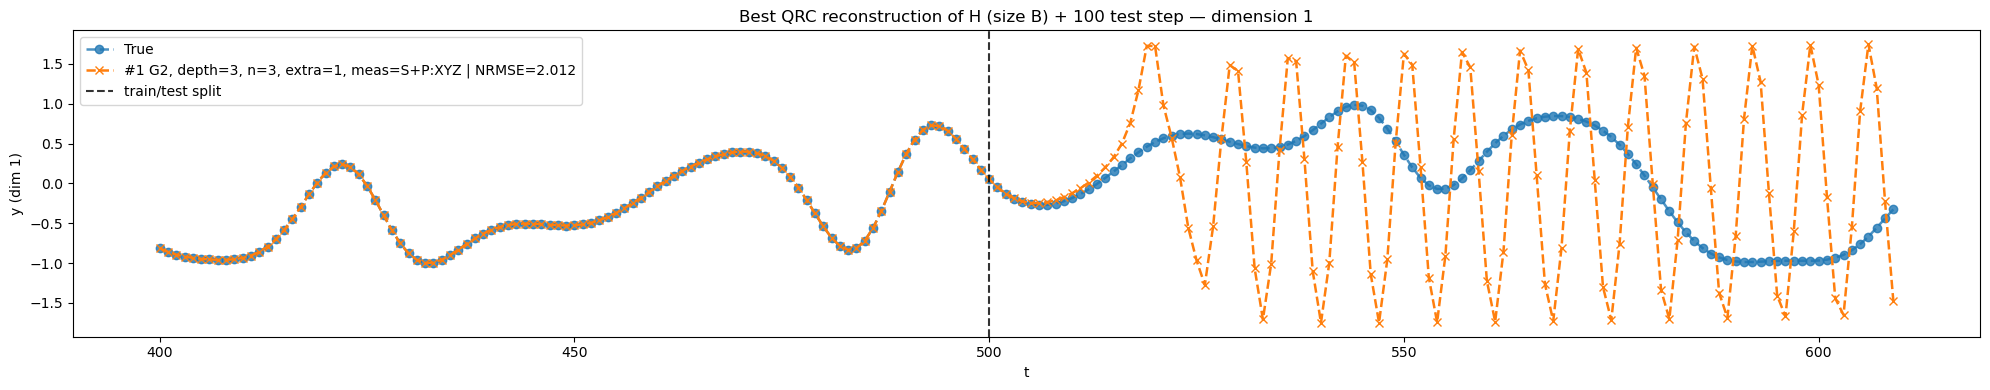

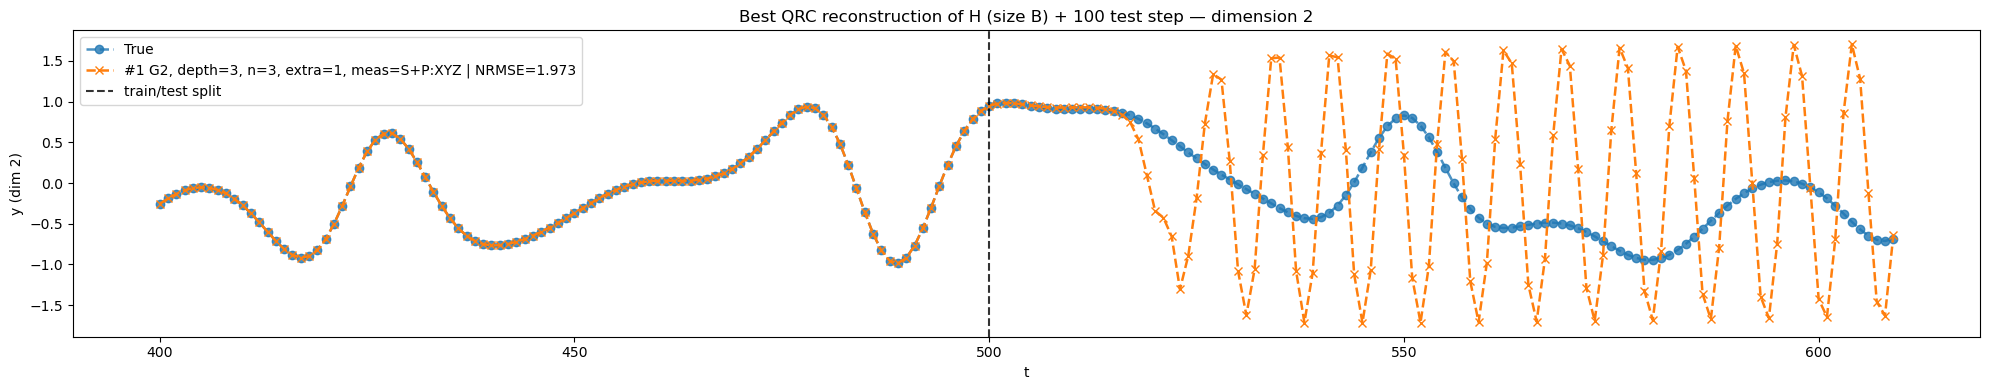

In [19]:
H_best_params_BP, H_worst_params_BP = OP.recompute_best_worst_from_logfile(file_path_HB, y_H[:T_H_B+100], T_train_H_B, T_test_H+100, nb_input_qubits = 1, k=1, is_dataset_classical=False, y_meas_bases=y_meas_basis) 
OP.plot_ranked_predictions_per_dim(
    H_best_params_BP[:1],
    T_train_H_B,
    title="Best QRC reconstruction of H (size B) + 100 test step", steps_training_included=100)

In [ ]:
H_best_params_C, H_worst_params_C = OP.find_optimal_res_sliding_window_quantum_dataset(y_H[:T_H_C], T_train_H_C, T_test_H, nb_input_qubits = 1,
                                                                                                sliding_window_size_range=(1,3), 
                                                                                                nb_extra_qubits_range=(1,2), 
                                                                                                seeds=[0,1], 
                                                                                                y_meas_bases = y_meas_basis,
                                                                                                try_res_G=True,
                                                                                                try_res_MG=False,
                                                                                                try_res_D=False,
                                                                                                try_res_ISING=False,
                                                                                                depths_G=[3, 5, 10])

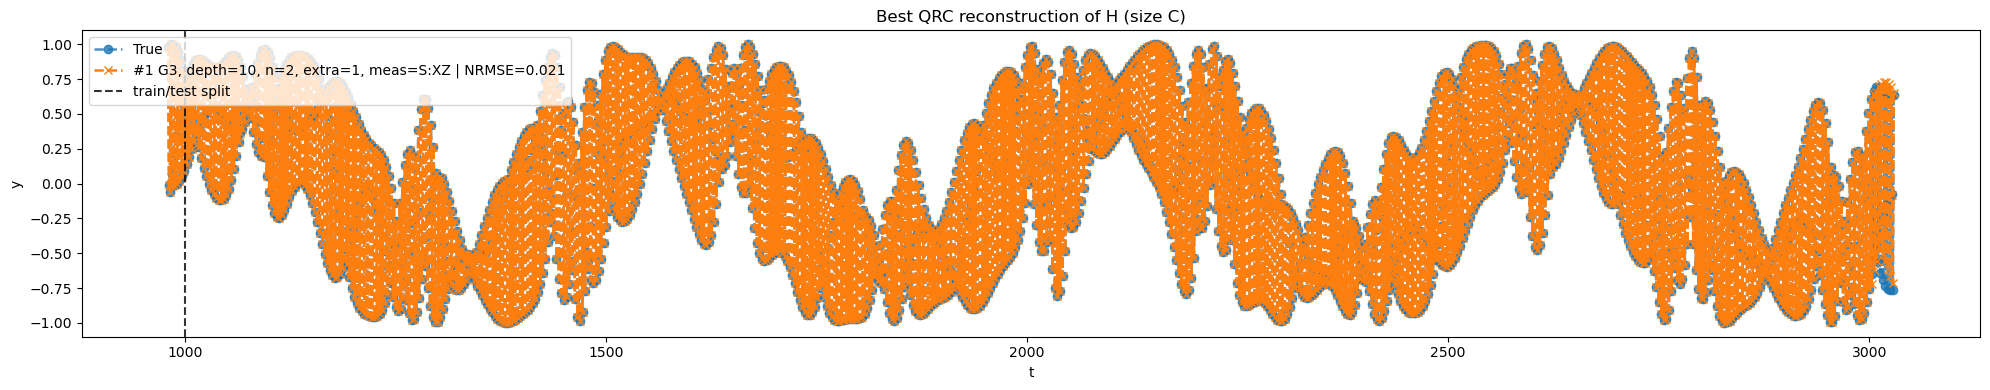

In [20]:
file_path_HC = "datas/Quantum_Datasets/G/HC.txt"
H_best_params_C, H_worst_params_C = OP.recompute_best_worst_from_logfile(file_path_HC, y_H[:T_H_C], T_train_H_C, T_test_H, nb_input_qubits = 1, k=1, is_dataset_classical=False, y_meas_bases=y_meas_basis) 
OP.plot_ranked_predictions(H_best_params_C[:1],T_train=T_train_H_C,title="Best QRC reconstruction of H (size C)", steps_training_included=20)

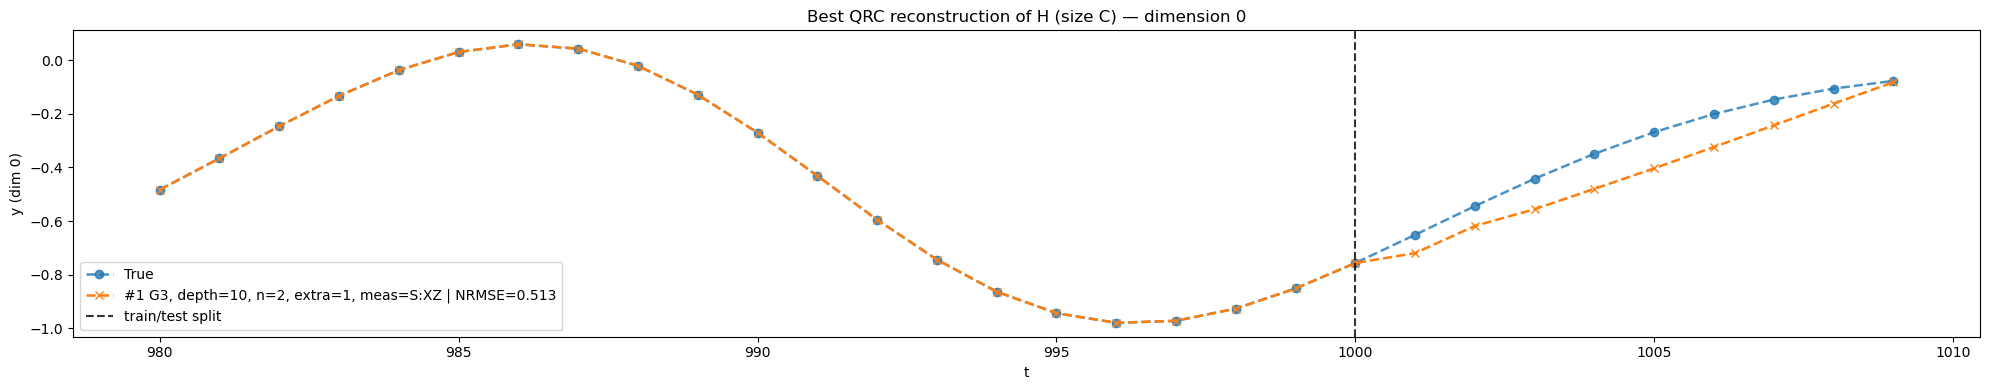

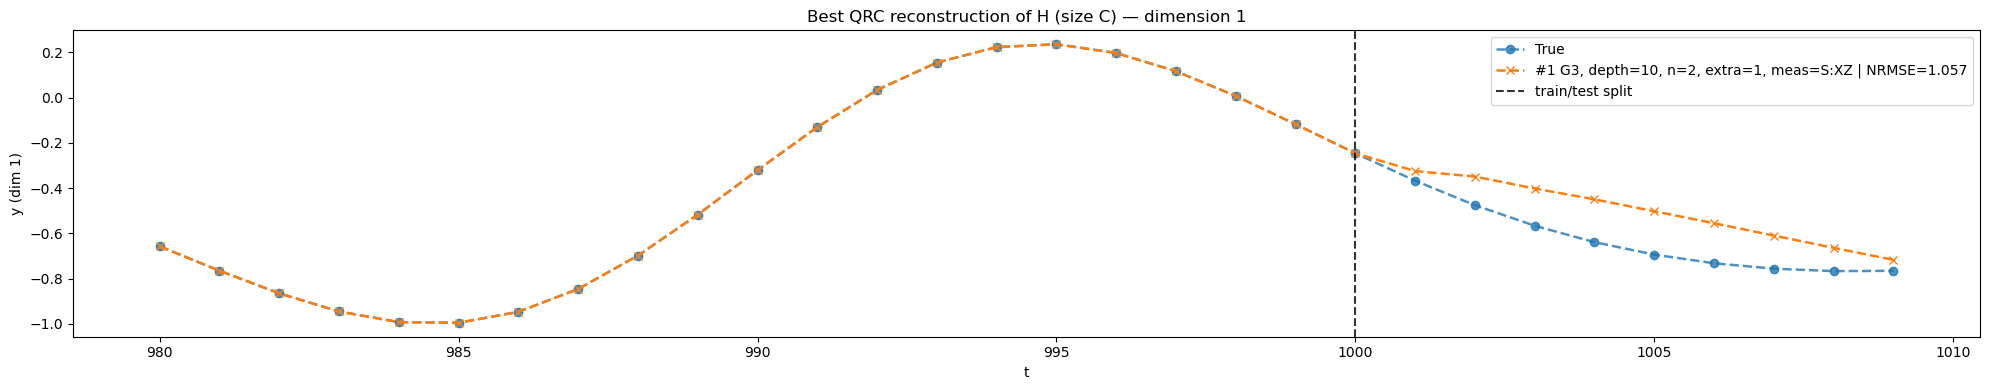

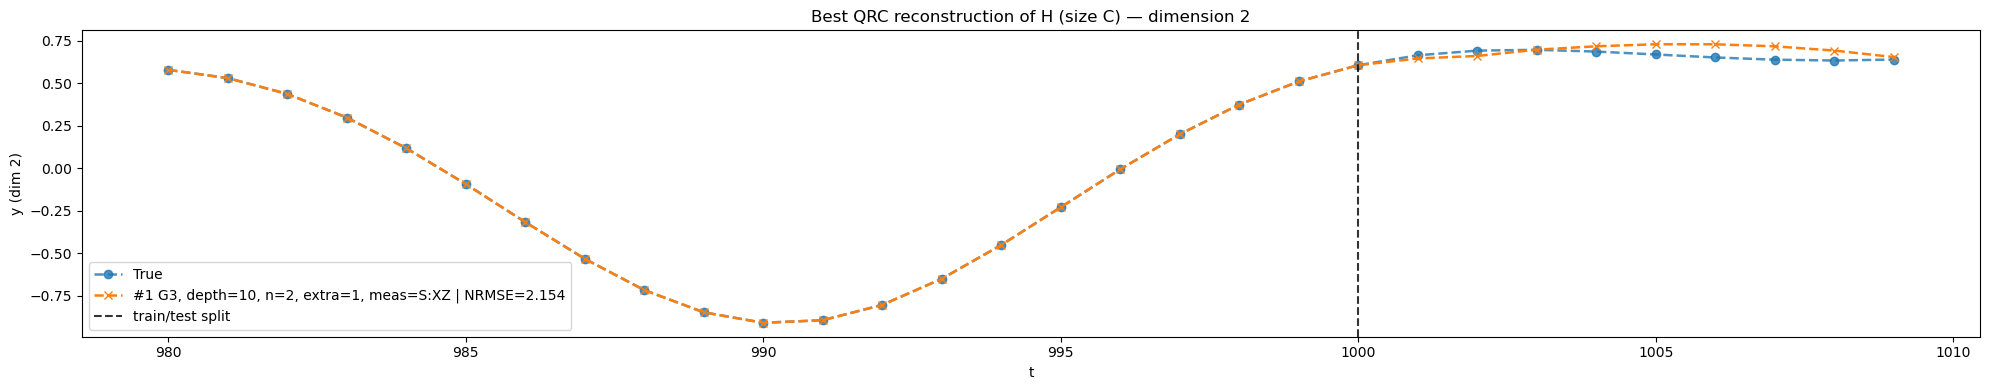

In [21]:
OP.plot_ranked_predictions_per_dim(
    H_best_params_C[:1],
    T_train_H_C,
    title="Best QRC reconstruction of H (size C)", steps_training_included=20)

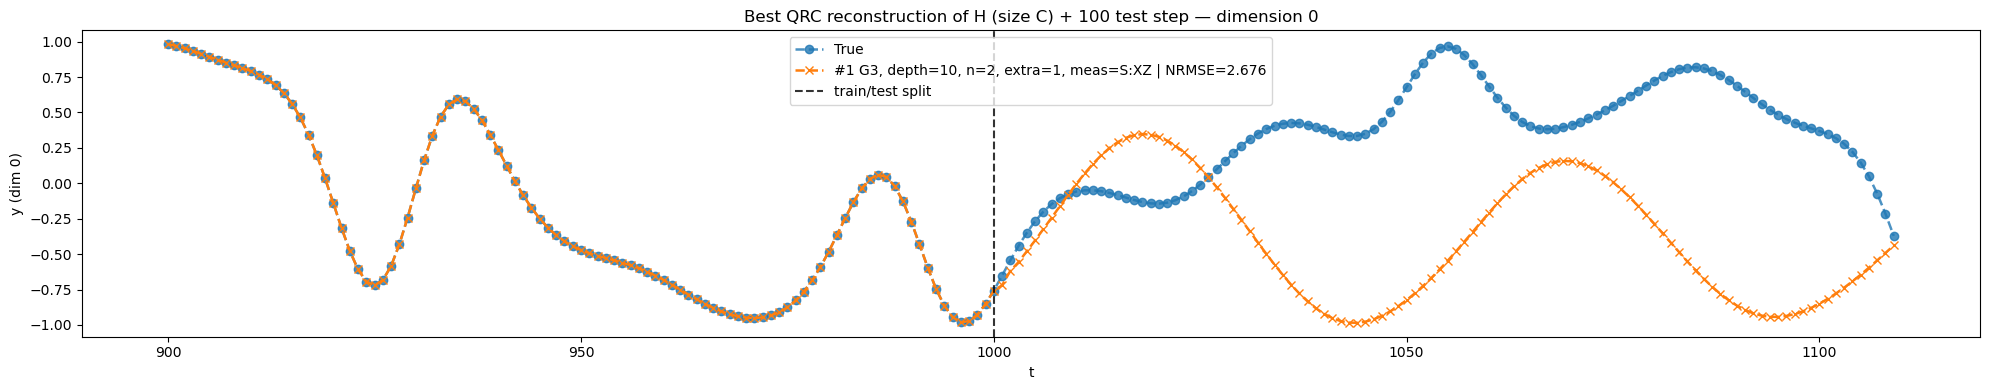

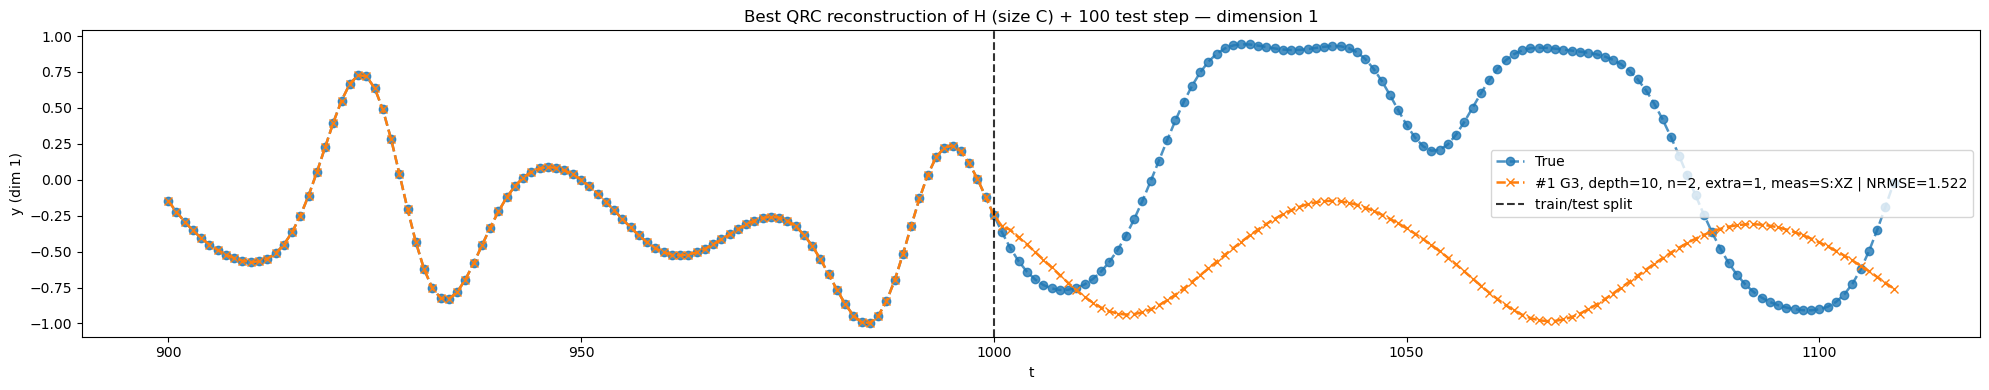

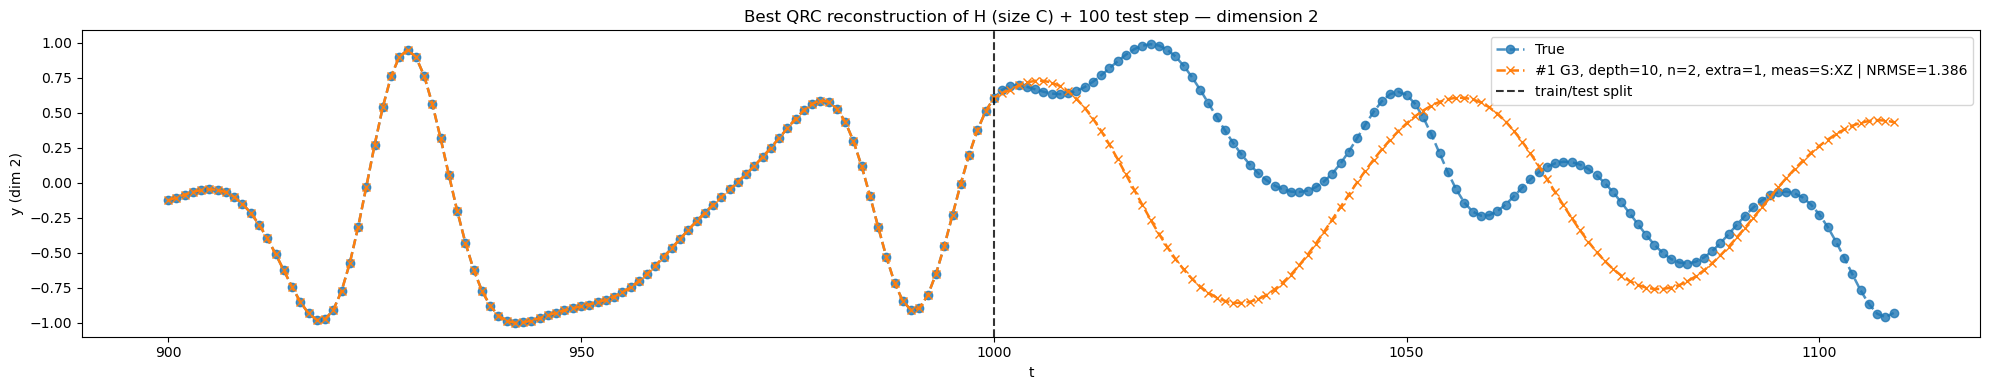

In [22]:
H_best_params_CP, H_worst_params_CP = OP.recompute_best_worst_from_logfile(file_path_HC, y_H[:T_H_C+100], T_train_H_C, T_test_H+100, nb_input_qubits = 1, k=1, is_dataset_classical=False, y_meas_bases=y_meas_basis) 
OP.plot_ranked_predictions_per_dim(
    H_best_params_CP[:1],
    T_train_H_C,
    title="Best QRC reconstruction of H (size C) + 100 test step", steps_training_included=100)

In [ ]:
H_best_params, H_worst_params = OP.find_optimal_res_sliding_window_quantum_dataset(y_H[:T_H_C], T_train_H_C, T_test_H, nb_input_qubits = 1,
                                                                                                sliding_window_size_range=(2,3), 
                                                                                                nb_extra_qubits_range=(0,2), 
                                                                                                seeds=[0,1], 
                                                                                                y_meas_bases = y_meas_basis,
                                                                                                try_res_G=True,
                                                                                                try_res_MG=True,
                                                                                                try_res_D=True,
                                                                                                try_res_ISING=True,
                                                                                                depths_G=[3, 10])

---
---